<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Feature Engineering

_Authors: Matt Brems (DC), Riley Dallas(AUS)_

---

## Review of Linear Regression
---

- Linear regression is a way for us to relate some dependent variable $Y$ to independent variables $X_1$,$\ldots$,$X_p$.
- We might write this out in one of the following two forms:
$$
\begin{eqnarray}
Y &=& \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p +\varepsilon\\
\mathbf{Y} &=& \mathbf{X \beta + \varepsilon}
\end{eqnarray}
$$

<details><summary>
There are four assumptions to the simple linear regression model and five assumptions to the multiple linear regression model.
</summary>
1. **Linearity:** $Y$ is linearly related to $X_i$ for all $i$.<br>
2. **Independence:** Each residual $\varepsilon_i$ is independent of $\varepsilon_j$ for all $i\neq j$.<br>
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.<br>
4. **Equality of Variance:** The errors (residuals) should have a roughly consistent pattern, regardless of the value of $X_i$. (There should be no discernible relationship between $X_i$ and the residuals.)<br>
5. **Independence Part II:** $X_i$ is independent of $X_j$ for all $i\neq j$.
</details>

We can measure the performance of our model by using mean squared error (MSE).

## Feature Engineering
---

- If I use degrees Fahrenheit to predict how much a substance will expand or inches of rain to predict traffic accidents, people outside the United States may have a tougher time understanding my work.
- If I use straight line distance (as the crow flies) between two locations, my estimated time of arrival in a taxi or a Lyft is going to be pretty bad.
- If I put text into my model without some sort of preprocessing, my computer isn't going to understand how to handle it.

Suffice it to say: If your features (variables) aren't good, your predictions and inferences won't be good!

#### What is feature engineering?

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." - Andrew Ng

**Feature engineering** is the term broadly applied to the creation and manipulation of features (variables) used in machine learning algorithms.

Unless we're working with the same data over and over again, this isn't something we can automate. It will require creativity and a good, thorough understanding of our data.

#### The Process of Data Science
1. Data Gathering
2. Data Cleaning/Munging
--Feature Engineering is done somewhere here--

3. EDA
4. Modeling
5. Reporting

Feature engineering will straddle all five of these steps, but mostly focus on steps 2 and 3.

#### [The Process of Feature Engineering](https://www.youtube.com/watch?v=drUToKxEAUA)
1. Brainstorming or testing features.
2. Deciding what features to create.
3. Creating features.
4. Checking how the features work with your model.
5. Improving features (if needed).
6. Return to step 1.
7. "Do data science!"

## Importing Libraries
---

We'll need the following libraries for today's lesson:

1. `pandas`
2. `numpy`
3. `seaborn`
4. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
5. a `LinearRegression` mode from `sklearn`'s `linear_model` module
6. `StandardScaler` and `PolynomialFeatures` from `sklearn`'s `preprocessing` module

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Load the Data

---

Today's dataset (`Advertising.csv`) is from the [ISLR website](https://statlearning.com/). 

Drop `Unnamed: 0` once you've loaded the csv into a `DataFrame`.

In [11]:
df = pd.read_csv('./datasets/Advertising.csv')
df.drop(columns="Unnamed: 0", inplace=True)
df_old = df

In [13]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


## Create our features matrix (`X`) and target vector (`y`)
---

The following columns will be our features:
- `TV`
- `radio`
- `newspaper`

The `sales` column is our target; the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [23]:
X = df[['TV', 'radio', 'newspaper']]
type(X)

pandas.core.frame.DataFrame

In [24]:
y = df['sales']
type(y)

pandas.core.series.Series

## Linear Regression model
---

In the cell below, create a `LinearRegression` model.

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X, y)

LinearRegression()

In [28]:
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [29]:
lr.intercept_

2.9388893694594067

## Baseline score
---

In the cell below, use `cross_val_score` to get a baseline $R^2$ for our model.

In [37]:
cross_val_score(lr,
                X,
                y,
                cv=5,
               ).mean()

# If "lr" is not there, it will take default. To get MSE:

# cross_val_score(lr,
#                 X,
#                 y,
#                 cv=5,
#                 scoring='neg_mean_squared_error'
#                ).mean()

# Reason for using neg = Higher score (More positive) is better

0.8871063495438436

## Interaction terms
---

Imagine seeing a commercial on TV, and then hearing a commercial by the same company a few days later. If you eventually purchase the product in question, was it the TV spot that swayed you or the radio commercial...or was a it a synergy of the two commercials that did the trick?

Interaction terms allow us to see what affect the **combination** of two features have on our label. For example, I'm not a fan of plain hot dogs, and I never eat mustard by itself. But I do enjoy hot dogs **with** mustard.

To create an interaction term, we simply do a pairwise multiplication of two columns:
```python
df['Interaction Col'] = df['Column 1'] * df['Column 2']
```

In the cell below, create an interaction column between `TV` and `radio`.

In [43]:
df['TVradio'] = df['TV'] * df['radio']
df.head(2)


,TV,radio,newspaper,sales,TVradio
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85


## EDA: Create a heatmap
---

In the cell below, create a heatmap in `seaborn` to show how our `TV * radio` interaction term correlates to all the other columns.

In [45]:
plt.figure(figsize=(12, 12))

sns.heatmap(data=df,
)

## EDA: Pairplot
---

Now use `seaborn`'s `.pairplot()` method to create scatterplots with our new column.

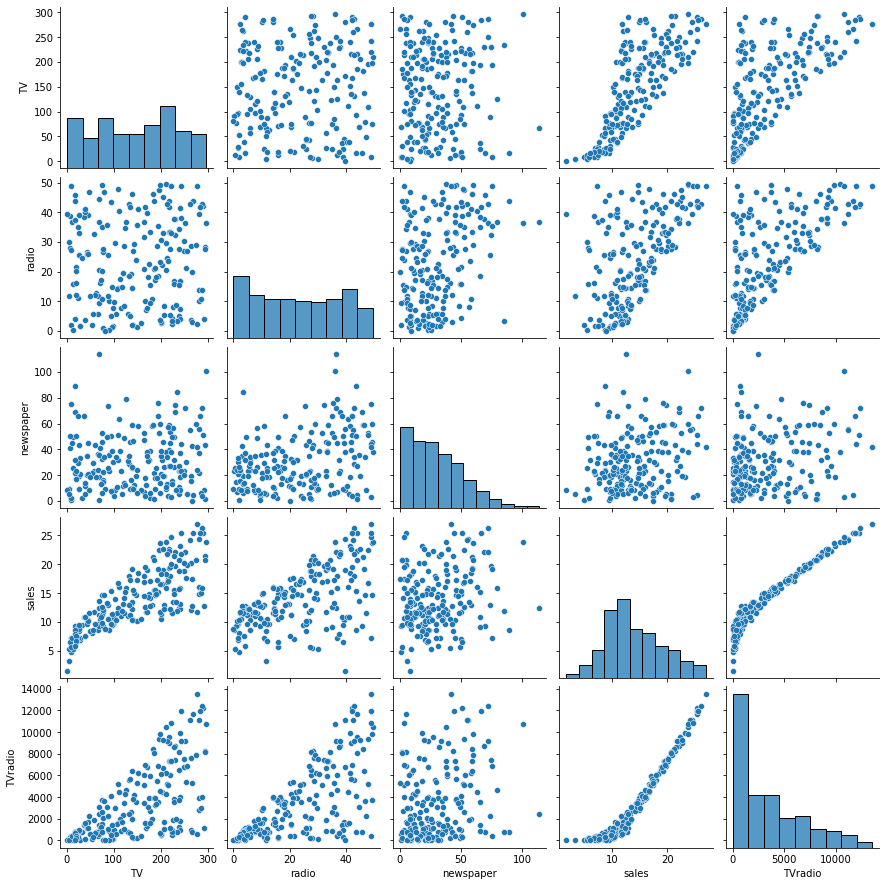

In [46]:
sns.pairplot(data=df);

## Create our features matrix (`X`) and target vector (`y`)
---

Our new column is highly correlated to our label, so let's incorporate it in our features matrix:
- `TV`
- `radio`
- `newspaper`
- `TV * radio` interaction term

The `sales` column is our label: the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [48]:
X = df[['TV', 'radio', 'newspaper', 'TVradio']]
type(X)

pandas.core.frame.DataFrame

In [49]:
y = df['sales']
type(y)

pandas.core.series.Series

## Model evaluation
---

Use `cross_val_score` to see how much our new feature moves the $R^2$ score.

In [54]:
cross_val_score(
    lr,
    X,
    y,
    cv=5,
#     scoring='neg_mean_squared_error'
).mean()

# R^2 increased from 88.7% to 96.4%
# Neg MSE increased from -3ish to -0.978 ==> Cross validated score comparison can show which is better

# How does CVS work?
# Step 1: Make k bins based on cv
# Step 2: Train and validate based on each bin 

0.9641704265806477

## `PolynomialFeatures`
---

Congrats! We struck gold on our first interaction term. The question now is how do we create interaction terms **en masse**? In our small dataset, we have three interaction terms:

<b> An interaction term is aka polynomial term </b>

Doing something like this:

>(X + Y + Z) * (X + Y + Z)

1. `TV * radio`
2. `TV * newspaper`
3. `radio * newspaper`

With larger datasets, manually creating interaction terms would quickly become untenable. That's where `sklearn`'s `PolynomialFeatures` comes in. `PolynomialFeatures` will return 9 columns from our original features matrix:

1. The original `TV` column
2. The original `radio` column
3. The original `newspaper` column
4. `TV^2` (`TV` squared)
5. `radio^2` (`radio` squared)
6. `newspaper^2` (`newspaper` squared)
7. `TV radio` interaction
8. `TV newspaper` interaction
9. `radio newspaper` interaction

In the cells provided, use `PolynomialFeatures` to transform `X`. **NOTE**: You'll need to set `include_bias=False`.

In [56]:
# Recreate features to be the original columns: TV, radio, newspaper
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [67]:
# Instantiate PolynomialFeatures
# We do not want to expand the constant term:
# (1 + X + Y) * (1 + X + Y)
poly = PolynomialFeatures(degree=2, include_bias=False)

In [68]:
# Create X_poly
poly.fit(X)

PolynomialFeatures(include_bias=False)

In [69]:
X_poly = poly.transform(X)

In [70]:
# View X_poly in a DataFrame
pd.DataFrame(
    X_poly,
    columns=poly.get_feature_names(['TV', 'radio', 'newspaper']),
)

# Default degree is 2, which means (X + Y + Z) (X + Y + Z) = X^2, XY, XZ, Y^2, YZ, Z^2 --> 6 features made
# Cons: Columns increase with the degrees and number of variables and will inflate the variance of the model
# without knowing if bias decreases enough. (don't use the word exponential)

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56
...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44


## Model evaluation
---

Use `cross_val_score` to see how much `PolynomialFeatures` affects the $R^2$ score.

In [72]:
cross_val_score(
    lr,
    X_poly,
    y,
    cv=5
).mean()

# R^2 increased from:
# (Default) No intermediary term: 88.7% to
# One intermediary term:          96.4% to 
# Multiple intermediary term:     98.4%


0.9842540981580088

## Scaling
---

Throughout this course, we'll encounter several models that require you to scale your data prior to modeling. Imagine you were trying predict the price of a house, and you had two features: square footage and number of bedrooms. These two features are on different scales, separated by a few orders of magnitude (square footage is in the thousands and number of bedrooms is in the single digits). 

When we scale our data, we essentially convert our columns into Z-scores. 

# NOTE: Scaling means: Removing the mean and dividing by StDev

### ${x- \mu \over \sigma}$

In the cell provided, scale the `TV` column.

In [76]:
# Removing the mean (de-meaning)
(df['TV'] - df['TV'].mean()) / df['TV'].std()
# [Series - float (Scalar)] / float (Scalar) becomes a Series



# This is known as BROADCASTING!!!!!

0      0.967425
1     -1.194379
2     -1.512360
3      0.051919
4      0.393196
         ...   
195   -1.267759
196   -0.615491
197    0.348934
198    1.590574
199    0.990720
Name: TV, Length: 200, dtype: float64

## `StandardScaler`
---

Rather than doing this manually for each column, `sklearn` has a `StandardScaler` class that allows us to scale our entire dataset in a few lines of code.

In [78]:
X = df[['TV', 'radio', 'newspaper']]
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

# Diff between ss.fit and lr.fit is that it comes from different libraries.
# ss comes from preprocessing, lr comes from linear_model

# Running .transform transforms the underlying data

In [80]:
# IRL, we have something more like:

# We fit on the training data, and transform train and testing data separately

# NOTE: WE DO NOT REFIT TEST DATA BECAUSE THERE IS A SEGREGATION BETWEEN TRAIN AND TEST
# aka it doesn't make sense to fit test data cause that's what we're trying to TEST OUT

X_train, X_test, y_train, y_test = train_test_split(X, y)
ss = StandardScaler()

# ss.fit(X_train)
# X_train_sc = ss.transform(X_train)
# often, we combine both lines aboveinto:
X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)




In [81]:
X_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

## Dummies
---

When we dummy a column, we're converting a categorical column into a one-hot encoded matrix. `pandas` allows us to do this with the `pd.get_dummies()` method.

In [82]:
fires = pd.read_csv('datasets/forestfires.csv')

In [87]:
fires[['day']]

,day
0,fri
1,tue
2,sat
3,fri
4,sun
...,...
512,sun
513,sun
514,sun
515,sat


In [89]:
# Q: How many columns will we get if we do:

# Ans: We will get 7 columns: day_sun, day_mon, day_tue, wed

# Q: How to reduce by 1 column?

# Ans: drop_first=True

pd.get_dummies(fires[['day']], drop_first=True)

,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,0,0,0,0,0,0
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
512,0,0,1,0,0,0
513,0,0,1,0,0,0
514,0,0,1,0,0,0
515,0,1,0,0,0,0
